<a href="https://colab.research.google.com/github/MariaReneeGonzalezBravo/SIMULACION-1/blob/main/Si_tinasfinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CAMIÓN DE TRANSPORTE

María Renée González Bravo


1.   La empresa TIBASA (fabricante de tinas de baño) tiene asignado un camión especial para el transporte de tinas terminadas. Dicho camión transporta diariamente 5 tinas. El peso de cada tina sigue la siguiente distribución de probabilidad:

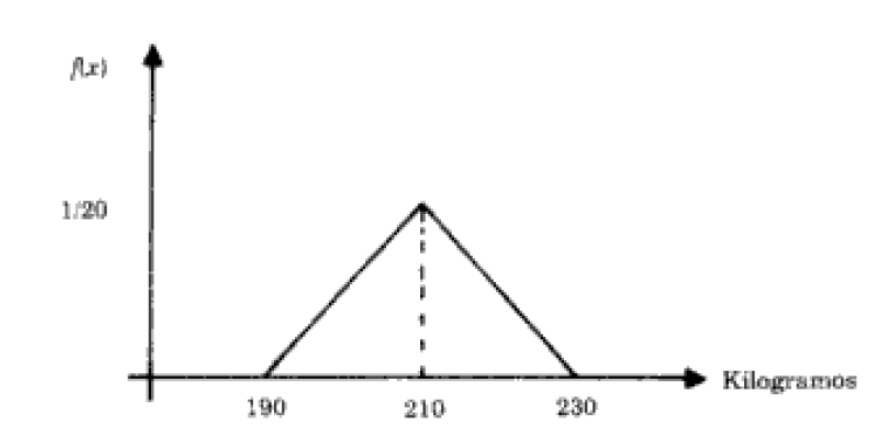

Si la capacidad del camión es de una tonelada, ¿cuál es la probabilidad de que el peso
de las tinas exceda la capacidad del camión?


**a) solución analítica**



Tenemos una función que sigue una probabilidad Triangular, donde $x_i \sim Triangular(a, b, c):  $ peso

Como queremos conocer la probabiludad de que 5 tinas excedan 1 tonelada (1000kg) se observa la siguiente condición: \\


  $x_1 + x_2 + x_3 + x_4 + x_5 > 1000 $

Especificamos $Triangular(a, b, c)$:

donde para la primer recta obtenemos la función $f_1$ con pendiente $m_1= \frac{1}{400}$ ; Así y = $ \frac{1}{400} (x - 190)$. \\
Para $f_2$ se obtiene $m_2=  - \frac{1}{400}$ ; Así y = $ - \frac{1}{400} (x - 230)$.

Luego,

$$
f(x) =
\begin{cases}
\frac{1}{400} (x - 190) & \text{si } 190 \leq x \leq 210  \\
 - \frac{1}{400} (x - 230) & \text{si } 210 < x \leq 230 \\
\end{cases}
$$

Obteniendo la media y la varianza para estandarizar su probabilidad

con   $$
E(x) = \int_{190}^{210} \frac{x(x-190)}{400}  \, dx -
\int_{210}^{230} \frac{x(x-230)}{400}  \, dx
$$

$$
  = \frac{1}{400}  ( \frac{x^3}{3} - 95x^2 \bigg|_{190}^{210} -\frac{x^3}{3} + 115x^2\bigg|_{210}^{230} )
$$

$$
  = \frac{1}{400}  ( -1102500 + 1143166.667 + 2027833.333 - 1984500 )
$$

$$
  = \frac{1}{400}  ( 84000 )
$$

$$
= 210
$$

Ahora $$
var(x) = \int_{-∞}^{∞} (x-E(x))^2 f(x)  \, dx
$$

$$
var(x) = \int_{190}^{210} \frac{(x-210)^2 (x-190)}{400}   \, dx -  \int_{190}^{210} \frac{(x-210)^2 (x-230)}{400}   \, dx
$$

$$
  = \frac{1}{400}  ( \frac{x^4}{4} - \frac{610x^3}{3} + 61950x^2 -8379000x \bigg|_{190}^{210} -\frac{x^4}{4} + \frac{650x^3}{3} -70350x^2 + 10143000x\bigg|_{210}^{230} )
$$

$$
  = \frac{1}{400}  ( -424462500 + 424475833.333 + 547955833.333 - 547942500 )
$$

$$
  = \frac{1}{400}  ( 26666.666 )
$$

$$
  = 66.66665 \sim 66.67 = \sigma^2
$$


Así $\sigma = 8.1651$

Como queremos calcular $P(x_1 + x_2 + x_3 + x_4 + x_5 > 1000)$

Usamos el Teorema central del límite:

$$\lim_{n \to \infty} P(\frac{x_1 + ... + x_n -n\mu}{\sigma \sqrt{n}} < x) = \emptyset(x) $$

Escribimos entonces

$$
\frac{x_1 + x_2 + x_3 + x_4 + x_5 - 5(210)}{\sqrt{\frac{200}{3}}\sqrt{5}} < \frac{1000 - 5(210)}{\sqrt{\frac{200}{3}}\sqrt{5}}
$$

Luego:
$$
\frac{x_1 + x_2 + x_3 + x_4 + x_5 - 5(210)}{\sqrt{\frac{200}{3}}\sqrt{5}} < -2.73
$$

sustituyendo en el Teorema

$$
P(z < -2.73) = \emptyset(-2.73)
$$

Así

$$
P(x_1 + x_2 + x_3 + x_4 + x_5 > 1000)  
$$

$$
= 1 - \emptyset(-2.73)
$$

$$
=0.997
$$

$$
=99.7%
$$

Luego, la probabilidad de que el peso de las tinas exceda la capacidad del camión es de 99.7%

**b) Simulación**



In [64]:
import numpy as np
import matplotlib.pyplot as plt

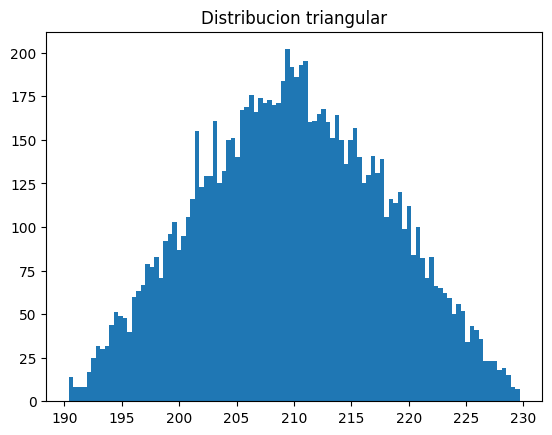

In [65]:
#Transformada inversa - pseudocódico
X=[]
for i in range(10000):
  u=np.random.rand()
  if u<0.5:
    x=20*(2*u)**(1/2) + 190
    X.append(x)
  else :
    x= -20*(2*(1-u))**(1/2) + 230
    X.append(x)



#Gráficas
plt.hist(X,bins=100)
plt.title("Distribucion triangular")
plt.show()

La probabilidad de que el peso de las tinas exceda la capacidad del camión es 0.9976


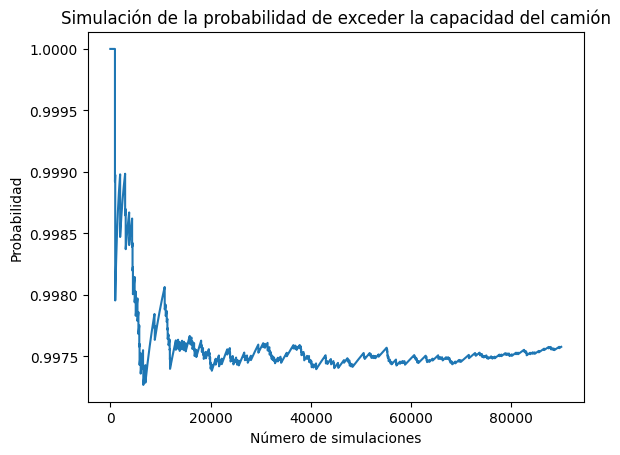

In [66]:
def tinas():
  X = np.zeros(5)
  for i in range(5):
    u=np.random.rand()
    if u < 0.5:
      X[i] = 20*(2*u)**(1/2) + 190
    else :
      X[i] = -20*(2*(1-u))**(1/2) + 230
  Suma = np.sum(X)
  return 1 if Suma > 1000 else 0

def sim_tinas(N=90000):
    s = 0
    l = []
    for i in range(N):
        j = tinas()
        s += j
        l.append(s / (i + 1))
    return l

#Gráficas
r = sim_tinas()
print(f"La probabilidad de que el peso de las tinas exceda la capacidad del camión es {r[-1]:.4f}")

plt.plot(r)
plt.xlabel('Número de simulaciones')
plt.ylabel('Probabilidad')
plt.title('Simulación de la probabilidad de exceder la capacidad del camión')
plt.show()




2.   Analice la conveniencia de adquirir un nuevo camión. Para tal propósito, suponga que
cada vez que la capacidad del camión es excedida una tina es enviada a través de otra
compañía a un costo de $\$200$.
También suponga que el costo promedio anual de un
nuevo camión es de $\$60, 000$. Si se trabaja 5 días a la semana y 52 semanas al año,
¿cuál de las dos alternativas mencionadas es la más atractiva?

**a) analíticamente**

Se trabaja 5 días a la semana, tomando en cuenta que un año tiene 52 semanas, el número de días totales a trabajar es de 5(52) = 260 días

así entonces, sí 260 días representa el 100% entonces 259 días representan el 99.7% que es la probabilidad de que las tinas excedan la tonelada como se obersvó en el ejercicio a).

Así costo = $259(\$200) = \$51,800$ es el costo de seguir enviando una tina a través de otra compañía, en este caso, adquirir el nuevo camíon tiene un costo de $ \$60,000 $, por lo que conviene más seguir con la otra compañía de intermediaria ya que se ahorra un total de $ \$8,200 $ por año.

**b) simulación**

Es más económico seguir usando el camión actual y pagar los envíos extra.
Costo anual de usar el camión actual y enviar tinas extra: $51862.49
Costo anual de operar un nuevo camión: $60000.00


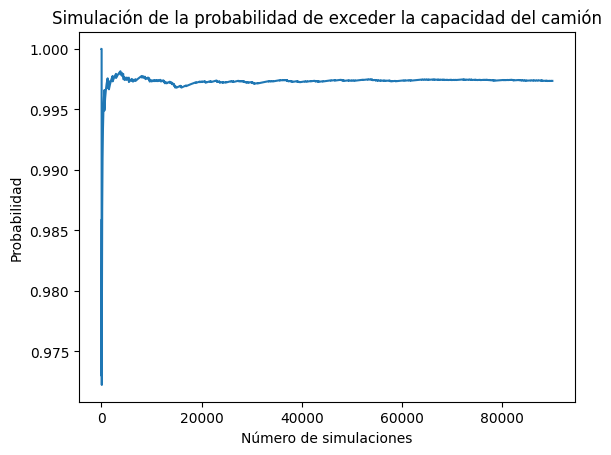

In [67]:
import numpy as np
import matplotlib.pyplot as plt

def tinas():
    X = np.zeros(5)
    for i in range(5):
        u = np.random.rand()
        if u < 0.5:
            X[i] = 20 * (2 * u)**(1/2) + 190
        else:
            X[i] = -20 * (2 * (1 - u))**(1/2) + 230
    Suma = np.sum(X)
    return 1 if Suma > 1000 else 0

def sim_tinas(N=90000):
    s = 0
    l = []
    for i in range(N):
        j = tinas()
        s += j
        l.append(s / (i + 1))
    return l

#costos
costo_extra = 200
costo_nuevo_camion = 60000
dias_laborales_anuales = 5 * 52  # 5 días a la semana por 52 semanas al año

# Simulación para calcular la probabilidad de exceder la capacidad del camión
r = sim_tinas()
probabilidad = r[-1]

# Cálculo de costos anuales usando el camión actual
envios_excedidos_anuales = probabilidad * dias_laborales_anuales
costo_anual_excedidos = envios_excedidos_anuales * costo_extra

# Comparar los costos
if costo_anual_excedidos < costo_nuevo_camion:
    print("Es más económico seguir usando el camión actual y pagar los envíos extra.")
    print(f"Costo anual de usar el camión actual y enviar tinas extra: ${costo_anual_excedidos:.2f}")
    print(f"Costo anual de operar un nuevo camión: ${costo_nuevo_camion:.2f}")
else:
    print("Es más económico adquirir un nuevo camión.")
    print(f"Costo anual de usar el camión actual y enviar tinas extra: ${costo_anual_excedidos:.2f}")
    print(f"Costo anual de operar un nuevo camión: ${costo_nuevo_camion:.2f}")

#Gráficas
plt.plot(r)
plt.xlabel('Número de simulaciones')
plt.ylabel('Probabilidad')
plt.title('Simulación de la probabilidad de exceder la capacidad del camión')
plt.show()
